<h2>Predicting Heart Attack Risk</h2>
<h3>Notebook 1: Data Wrangling</h3>
<p><b>Author: Nikhar Bhavsar</b></p>

<hr>

<h4>Welcome to the First Notebook of Predicting Heart Attacks!</h4>

<p>In this notebook, we will:</p>
<ul>
  <li>Handle missing entries and remove duplicates.</li>
  <li>Examine individual features for data quality and significance.</li>
  <li>Visualize distributions and identify potential patterns.</li>
  <li>Rename columns for better understanding and usability.</li>
</ul>

<hr>

<ul>
  <li>This dataset has <b>246,022 records and 40 columns</b> of uncleaned data.</li>
  <li>It was acquired from the Kaggle [4], which sourced the data from the <b>CDC’s Behavioral Risk Factor Surveillance System (BRFSS)</b>.</li>
  <li>The objective is to perform:
    <ul>
      <li><b>Data Cleaning:</b> Dropping null values and removing duplicates.</li>
      <li><b>Data Transformation:</b> Renaming columns for better understanding.</li>
      <li><b>Exploratory Data Analysis (EDA):</b> Visualizing individual features.</li>
    </ul>
  </li>
</ul>

<hr>

<p><b>Dataset Information:</b></p>
    <ul>
        <li><strong>Shape:</strong> (246,022, 40)</li>
        <li><strong>Target Variable:</strong> HadHeartAttack (Indicates if the person had a heart attack)</li>
        <li><strong>Features:</strong> Age, BMI, SleepHours, PhysicalActivity, SmokingStatus, Cholesterol, BloodPressure, Diabetes, and more.</li>
    </ul>

## Table of Contents
1. [Importing Libraries](#importing-libraries)
2. [Defining functions](#defining-functions)
3. [Loading Data](#loading-data)
4. [Create Data-Dictionary](#create-data-dictionary)
5. [EDA](#eda)
6. [References with Links](#references-with-links)

## Importing Libraries

In [2096]:
# Data Manipulation and Analysis
import numpy as np  
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns  
import plotly.express as px

## Defining functions

In [2098]:
# Importing the data
def import_csv(file_path):
    """
    Import CSV data into a pandas DataFrame.

    Parameters:
        file_path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: DataFrame containing the CSV data.
    """
    data = pd.read_csv(file_path)
    return data

def generate_data_dictionary(df, column_descriptions):
    """
    Generate a data dictionary.

    Parameters:
        df (pd.DataFrame): The DataFrame.
        column_descriptions (dict):  column names with their descriptions.

    Returns:
        pd.DataFrame: Return the data-dictionary for all the columns in the Data-frame.
    """
    
    heart_attack_dict = []

    # Loop through all columns in the DataFrame
    for column in df.columns:
        # Append column details
        heart_attack_dict.append({
            'Column Name': column,
            'Data Type': df[column].dtype,
            'Description': column_descriptions.get(column, 'Description not available'),
            'Unique Values': df[column].nunique(),
            'Missing Values': df[column].isnull().sum(),
            'Distinct Values': df[column].dropna().unique().tolist(),
            'Value Range': (df[column].min(), df[column].max()) if pd.api.types.is_numeric_dtype(df[column]) else 'N/A',
        })

    # Convert the list to a DataFrame
    heart_attack_dict_df = pd.DataFrame(heart_attack_dict)
    return heart_attack_dict_df

def define_df_settings():
    """
    Define the necessary data frame settinfs.
    """
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)

def display_plot(data, column, plot_type='hist', bins=30, xlabel=None, ylabel=None, title=None, title_orientation='None', sort=False):
    """
    Plots various EDA charts for a given column.
    
    Parameters:
    - data: DataFrame containing the data.
    - column: Column name to visualize.
    - plot_type: Type of plot ('bar', 'hist', 'box', 'violin', 'scatter', 'pair', 'correlation'). Default is 'hist'.
    - bins: Number of bins for histograms. Default is 30.
    - xlabel: Custom label for the x-axis.
    - ylabel: Custom label for the y-axis.
    - title: Custom title for the plot.
    - orientation: Histogram orientation ('vertical' or 'horizontal'). Default is 'vertical'.
    - sort: Whether to sort categorical data in ascending order (only applicable for bar plots). Default is False.
    """
    plt.figure(figsize=(10, 5))
    
    if plot_type == 'bar':
        value_counts = data[column].value_counts()
        if sort:
            value_counts = value_counts.sort_index()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        if title_orientation == 'vertical':
            plt.xticks(rotation=90)

    elif plot_type == 'hist':
            plt.hist(data[column], bins=bins, alpha=0.7, color='blue', edgecolor='black')
            plt.xlabel(xlabel if xlabel else column,)
            plt.ylabel(ylabel if ylabel else 'Frequency')
            if title_orientation == 'vertical':
                plt.xticks(rotation=90)
    elif plot_type == 'box':
        if orientation == 'horizontal':
            sns.boxplot(x=data[column])
        else:
            sns.boxplot(y=data[column])
    elif plot_type == 'violin':
        if orientation == 'horizontal':
            sns.violinplot(x=data[column])
        else:
            sns.violinplot(y=data[column])
    elif plot_type == 'scatter':
        sns.scatterplot(x=data.index, y=data[column])
    elif plot_type == 'pair':
        sns.pairplot(data)
        plt.show()
        return
    elif plot_type == 'correlation':
        plt.figure(figsize=(10, 6))
        sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix')
        plt.show()
        return
    else:
        raise ValueError("Invalid plot_type. Choose from 'bar', 'hist', 'box', 'violin', 'scatter', 'pair', or 'correlation'.")
    
    plt.title(title if title else f'{plot_type.capitalize()} plot for {column}')
    plt.show()


## Loading Data

In [2100]:
df = import_csv('./../data/heart_attack.csv')
define_df_settings()

Let's look at the columns which are present into our dataset.

In [2102]:
df.shape

(246022, 40)

In [2103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

As we can see we have 6 numerical (float64) and 34 categorical (object) columns in our dataset.
Let's have a initial look atthe data stored in all of these columns.

In [2105]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ago),Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ago),Yes,6.0,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ago),No,8.0,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the past 10 years",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ago),Yes,9.0,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the past 10 years",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ago),Yes,5.0,1 to 5,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the past 10 years",No,No


## Create Data-Dictionary
It will be the good idea to create the data-dictionary. So we can have a quick look when we want.

In [2107]:
feature_descriptions = {
    "State": "State FIPS Code",
    "Sex": "Sex of Respondent",
    "GeneralHealth": "Would you say that in general your health is:",
    "PhysicalHealthDays": "For how many days during the past 30 days was your physical health not good?",
    "MentalHealthDays": "For how many days during the past 30 days was your mental health not good?",
    "LastCheckupTime": "About how long has it been since you last visited a doctor for a routine checkup?",
    "PhysicalActivities": "Did you participate in any physical activities or exercises in the past month?",
    "SleepHours": "On average, how many hours of sleep do you get in a 24-hour period?",
    "RemovedTeeth": "Number of permanent teeth removed due to decay or gum disease (excluding injury/orthodontics)",
    "HadHeartAttack": "Ever told you had a heart attack (myocardial infarction)?",
    "HadAngina": "Ever told you had angina or coronary heart disease?",
    "HadStroke": "Ever told you had a stroke?",
    "HadAsthma": "Ever told you had asthma?",
    "HadSkinCancer": "Ever told you had skin cancer (not melanoma)?",
    "HadCOPD": "Ever told you had COPD, emphysema, or chronic bronchitis?",
    "HadDepressiveDisorder": "Ever told you had a depressive disorder (e.g., major depression, dysthymia)?",
    "HadKidneyDisease": "Ever told you had kidney disease (excluding kidney stones, bladder infection, incontinence)?",
    "HadArthritis": "Ever told you had arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia?",
    "HadDiabetes": "Ever told you had diabetes?",
    "DeafOrHardOfHearing": "Are you deaf or do you have serious difficulty hearing?",
    "BlindOrVisionDifficulty": "Are you blind or do you have serious difficulty seeing, even with glasses?",
    "DifficultyConcentrating": "Do you have serious difficulty concentrating, remembering, or making decisions?",
    "DifficultyWalking": "Do you have serious difficulty walking or climbing stairs?",
    "DifficultyDressingBathing": "Do you have difficulty dressing or bathing?",
    "DifficultyErrands": "Do you have difficulty doing errands alone (e.g., visiting a doctor, shopping)?",
    "SmokerStatus": "Four-level smoker status: Everyday smoker, Someday smoker, Former smoker, Non-smoker",
    "ECigaretteUsage": "E-cigarette usage: Never used, currently using daily/some days, or used in the past but not currently",
    "ChestScan": "Have you ever had a CT or CAT scan of your chest area?",
    "RaceEthnicityCategory": "Five-level race/ethnicity category",
    "AgeCategory": "Fourteen-level age category",
    "HeightInMeters": "Reported height in meters",
    "WeightInKilograms": "Reported weight in kilograms",
    "BMI": "Body Mass Index (BMI)",
    "AlcoholDrinkers": "Adults who reported having had at least one drink of alcohol in the past 30 days",
    "HIVTesting": "Adults who have ever been tested for HIV",
    "FluVaxLast12": "Have you had a flu vaccine (nasal spray or injection) in the past 12 months?",
    "PneumoVaxEver": "Have you ever had a pneumonia shot (pneumococcal vaccine)?",
    "TetanusLast10Tdap": "Have you received a tetanus shot in the past 10 years? Was it Tdap (with pertussis)?",
    "HighRiskLastYear": "High-risk behaviors in the past year: Injected drugs, treated for STD, exchanged sex for money/drugs",
    "CovidPos": "Ever tested positive for COVID-19 (confirmed by a healthcare professional)?"
}

# Create data dictionary
heart_attack_data_dictionary = generate_data_dictionary(df,feature_descriptions)
display(heart_attack_data_dictionary)

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
0,State,object,State FIPS Code,54,0,"[Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, District of Columbia, Florida, Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming, Guam, Puerto Rico, Virgin Islands]",N/A
1,Sex,object,Sex of Respondent,2,0,"[Female, Male]",N/A
2,GeneralHealth,object,Would you say that in general your health is:,5,0,"[Very good, Fair, Good, Excellent, Poor]",N/A
3,PhysicalHealthDays,float64,For how many days during the past 30 days was your physical health not good?,31,0,"[4.0, 0.0, 5.0, 3.0, 2.0, 25.0, 30.0, 15.0, 29.0, 8.0, 16.0, 20.0, 10.0, 9.0, 7.0, 1.0, 21.0, 6.0, 27.0, 14.0, 12.0, 11.0, 13.0, 28.0, 17.0, 23.0, 24.0, 26.0, 18.0, 22.0, 19.0]","(0.0, 30.0)"
4,MentalHealthDays,float64,For how many days during the past 30 days was your mental health not good?,31,0,"[0.0, 15.0, 4.0, 25.0, 5.0, 30.0, 27.0, 3.0, 2.0, 1.0, 10.0, 20.0, 21.0, 6.0, 7.0, 8.0, 14.0, 9.0, 12.0, 18.0, 29.0, 28.0, 17.0, 11.0, 16.0, 13.0, 26.0, 22.0, 24.0, 19.0, 23.0]","(0.0, 30.0)"
5,LastCheckupTime,object,About how long has it been since you last visited a doctor for a routine checkup?,4,0,"[Within past year (anytime less than 12 months ago), 5 or more years ago, Within past 2 years (1 year but less than 2 years ago), Within past 5 years (2 years but less than 5 years ago)]",N/A
6,PhysicalActivities,object,Did you participate in any physical activities or exercises in the past month?,2,0,"[Yes, No]",N/A
7,SleepHours,float64,"On average, how many hours of sleep do you get in a 24-hour period?",23,0,"[9.0, 6.0, 8.0, 5.0, 7.0, 10.0, 4.0, 12.0, 3.0, 18.0, 11.0, 2.0, 1.0, 16.0, 14.0, 15.0, 13.0, 20.0, 24.0, 23.0, 19.0, 17.0, 22.0]","(1.0, 24.0)"
8,RemovedTeeth,object,Number of permanent teeth removed due to decay or gum disease (excluding injury/orthodontics),4,0,"[None of them, 6 or more, but not all, 1 to 5, All]",N/A
9,HadHeartAttack,object,Ever told you had a heart attack (myocardial infarction)?,2,0,"[No, Yes]",N/A


In [2108]:
# Get the number of NaN values in our DF
missing_data = df.isnull().sum()
missing_data

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [2109]:
# Get all the duplicated rows
duplicated_rows = df[df.duplicated()]
display(duplicated_rows)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
5702,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ago),Yes,7.0,None of them,No,No,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 75 to 79,1.63,56.70,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
87555,Maryland,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ago),Yes,8.0,None of them,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 65 to 69,1.65,45.36,16.64,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
88402,Maryland,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ago),Yes,8.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 50 to 54,1.75,65.77,21.41,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
137645,New Jersey,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ago),No,8.0,"6 or more, but not all",No,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.63,80.74,30.55,Yes,No,No,No,"No, did not receive any tetanus shot in the past 10 years",No,No
174923,Rhode Island,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ago),Yes,7.0,1 to 5,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 75 to 79,1.57,68.04,27.44,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the past 10 years",No,No
184137,South Dakota,Female,Fair,30.0,0.0,Within past year (anytime less than 12 months ago),Yes,7.0,None of them,No,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 70 to 74,1.75,90.72,29.53,No,No,Yes,Yes,"No, did not receive any tetanus shot in the past 10 years",No,No
208013,Vermont,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ago),Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 70 to 74,1.65,79.38,29.12,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
216362,Washington,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ago),Yes,7.0,None of them,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 60 to 64,1.80,77.11,23.71,Yes,Yes,Yes,No,"Yes, received Tdap",No,No
225974,Washington,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ago),Yes,7.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 65 to 69,1.93,104.33,28.00,Yes,Yes,Yes,Yes,"No, did not receive any tetanus shot in the past 10 years",No,No


We are lucky. We only have the 9 rows of duplicated data. It is a good idea to remove them since it is a small amount.

In [2111]:
# Drop the duplicated rows
df = df.drop_duplicates()

Let's verify if drop_duplicates has removed all the duplicated rows.

In [2113]:
df[df.duplicated()]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos


## EDA

We can remove the features <b>RemovedTeeth, HadAsthma, HadSkinCancer, DeafOrHardOfHearing, BlindOrVisionDifficulty, DifficultyConcentrating, DifficultyWalking, DifficultyDressingBathing, DifficultyErrands, HIVTesting, FluVaxLast12, PneumoVaxEver and TetanusLast10Tdap</b> to focus the analysis on factors directly related to heart health and heart attack risk. 

These features, which include dental health, sensory disabilities, mobility issues, vaccinations, and infections, are not strongly associated with heart/cardio risk. 
Removing them reduces noise, simplifies the dataset, and ensures the analysis remains targeted on relevant predictors of heart attacks. 

I have made the decison based on some medial publication references, such as the American Heart Association (AHA) [1], which outlines key risk factors for heart attacks but does not include dental health or vaccinations. 

The World Health Organization (WHO) [2], which highlights that factors like asthma, skin cancer, and sensory disabilities are not directly linked to cardiovascular diseases. 

Additionally, the Mayo Clinic [3] notes that have some details about the relationship detween dental health and heart disease.

In [2116]:
features_to_remove = [
    'RemovedTeeth', 'HadAsthma', 'HadSkinCancer', 'DeafOrHardOfHearing', 
    'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 
    'DifficultyDressingBathing', 'DifficultyErrands', 'HIVTesting', 
    'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'CovidPos'
]

# remove certain un-related features
df = df.drop(columns=features_to_remove)

### Numerical Features

In [2118]:
# Get the numerical feature columns
numerical_df = df.select_dtypes(include=np.number)
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 0 to 246021
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PhysicalHealthDays  246013 non-null  float64
 1   MentalHealthDays    246013 non-null  float64
 2   SleepHours          246013 non-null  float64
 3   HeightInMeters      246013 non-null  float64
 4   WeightInKilograms   246013 non-null  float64
 5   BMI                 246013 non-null  float64
dtypes: float64(6)
memory usage: 13.1 MB


As we can see we have five numerical features. Let's look at their data na d distribution individually.

In [2120]:
# Get the statistical details of all Numerical columns ie. min-max-mean-std-IQR etc.
numerical_df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000
mean,4.119055,4.167292,7.021312,1.705150,83.615522,28.668258
std,8.405803,8.102796,1.440698,0.106654,21.323232,6.514005
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


#### PhysicalHealthDays

In [2122]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'PhysicalHealthDays']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
3,PhysicalHealthDays,float64,For how many days during the past 30 days was your physical health not good?,31,0,"[4.0, 0.0, 5.0, 3.0, 2.0, 25.0, 30.0, 15.0, 29.0, 8.0, 16.0, 20.0, 10.0, 9.0, 7.0, 1.0, 21.0, 6.0, 27.0, 14.0, 12.0, 11.0, 13.0, 28.0, 17.0, 23.0, 24.0, 26.0, 18.0, 22.0, 19.0]","(0.0, 30.0)"


As we can seePhysicalHealthDays has 31 unique values and has a mean of 4.119055.

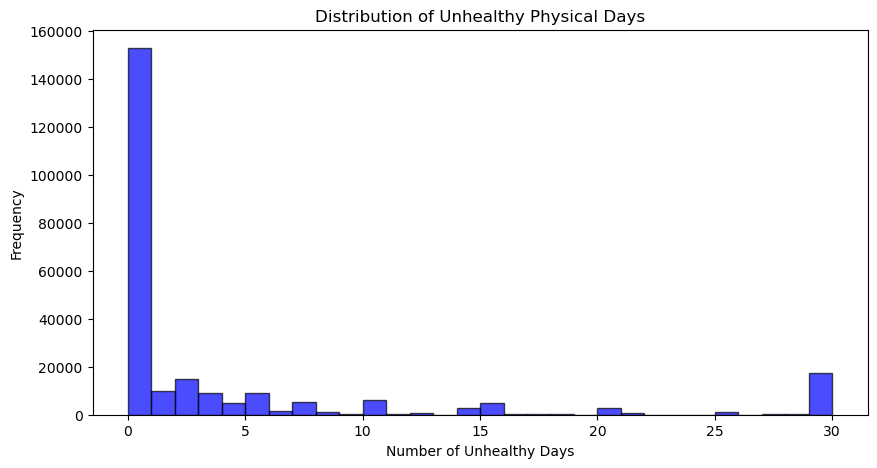

In [2124]:
display_plot(numerical_df, 'PhysicalHealthDays', 'hist', xlabel='Number of Unhealthy Days', ylabel='Frequency', title='Distribution of Unhealthy Physical Days')

The chart shows the distribution of unhealthy days, represented by the variable "PhysicalHealthDays." Most people reported zero unhealthy days, as shown by the highest bar at 0. There are smaller counts for other values, with a noticeable spike at 30, which could indicate a cap or maximum value in the data.

#### MentalHealthDays

In [2127]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'MentalHealthDays']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
4,MentalHealthDays,float64,For how many days during the past 30 days was your mental health not good?,31,0,"[0.0, 15.0, 4.0, 25.0, 5.0, 30.0, 27.0, 3.0, 2.0, 1.0, 10.0, 20.0, 21.0, 6.0, 7.0, 8.0, 14.0, 9.0, 12.0, 18.0, 29.0, 28.0, 17.0, 11.0, 16.0, 13.0, 26.0, 22.0, 24.0, 19.0, 23.0]","(0.0, 30.0)"


Same as PhysicalHealthDays - MentalHealthDays has 31 unique values as well as median of 4.167292.

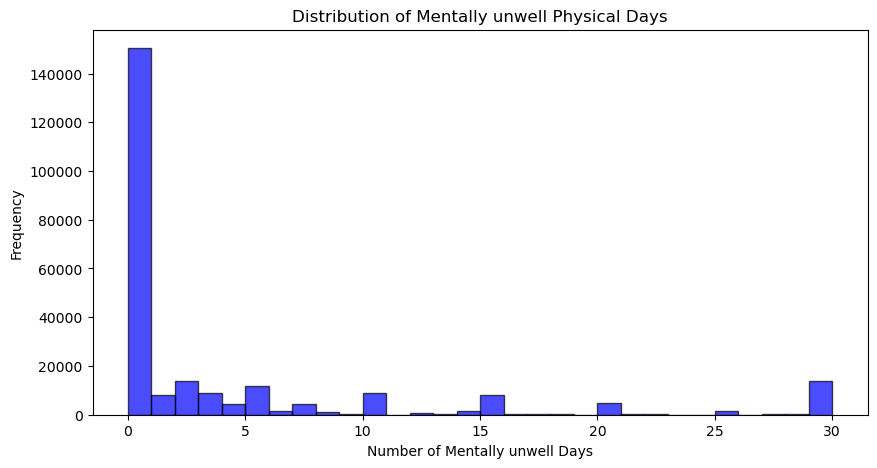

In [2129]:
display_plot(numerical_df, 'MentalHealthDays', 'hist', xlabel='Number of Mentally unwell Days', ylabel='Frequency', title='Distribution of Mentally unwell Physical Days')

The chart shows the distribution of mental unwell days, represented by the variable "MentalHealthDays." Most people reported zero unhealthy days, as shown by the highest bar at 0. 

#### SleepHours

In [2132]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'SleepHours']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
7,SleepHours,float64,"On average, how many hours of sleep do you get in a 24-hour period?",23,0,"[9.0, 6.0, 8.0, 5.0, 7.0, 10.0, 4.0, 12.0, 3.0, 18.0, 11.0, 2.0, 1.0, 16.0, 14.0, 15.0, 13.0, 20.0, 24.0, 23.0, 19.0, 17.0, 22.0]","(1.0, 24.0)"


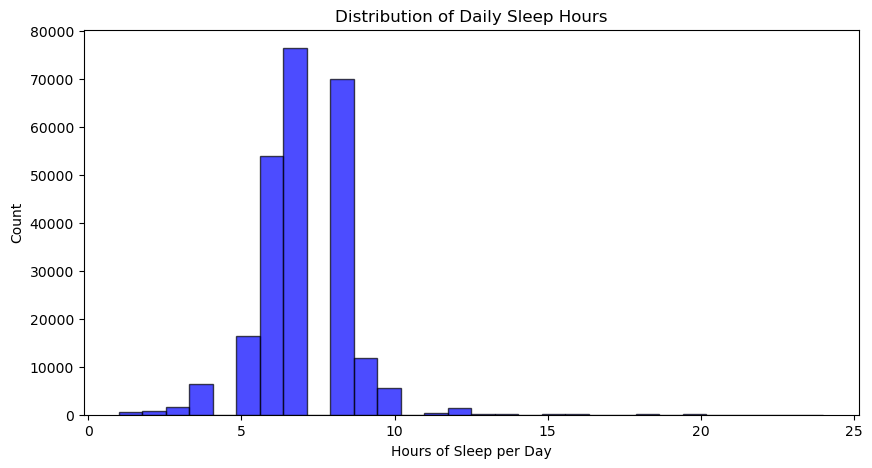

In [2133]:
display_plot(numerical_df, 'SleepHours', 'hist', xlabel='Hours of Sleep per Day', ylabel='Count', title= 'Distribution of Daily Sleep Hours')

Most people report sleeping between 5 to 10 hours per day, with the highest frequencies around 7 to 8 hours, which aligns with recommended sleep guidelines.

There are very few people reporting less than 5 hours of sleep, but the numbers gradually increase as it approaches the 7-8 hour range.

A small number of people report sleeping more than 10 hours, with very few cases beyond 15 hours.

#### HeightInMeters

In [2136]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'HeightInMeters']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
30,HeightInMeters,float64,Reported height in meters,101,0,"[1.6, 1.78, 1.85, 1.7, 1.55, 1.63, 1.75, 1.68, 1.83, 1.52, 1.88, 1.5, 1.73, 1.65, 1.8, 1.57, 1.91, 1.47, 1.42, 1.22, 1.93, 2.01, 1.96, 1.98, 1.45, 1.35, 1.76, 2.03, 2.16, 1.51, 1.53, 1.69, 1.56, 1.84, 1.9, 1.54, 1.72, 1.87, 1.74, 1.4, 1.64, 1.58, 1.62, 1.79, 1.67, 1.46, 1.89, 1.61, 1.3, 1.37, 2.13, 2.06, 2.11, 0.91, 2.26, 2.18, 1.77, 2.36, 1.59, 1.86, 1.82, 1.66, 1.71, 1.95, 1.05, 2.08, 1.49, 1.38, 1.81, 1.44, 1.48, 1.19, 1.32, 1.24, 1.07, 1.04, 1.27, 1.1, 1.92, 1.2, 2.24, 1.12, 1.03, 0.97, 1.25, 2.29, 1.16, 1.18, 1.09, 2.41, 1.0, 1.17, 1.08, 1.43, 1.14, 1.02, 2.0, 2.02, 0.95, 2.34, ...]","(0.91, 2.41)"


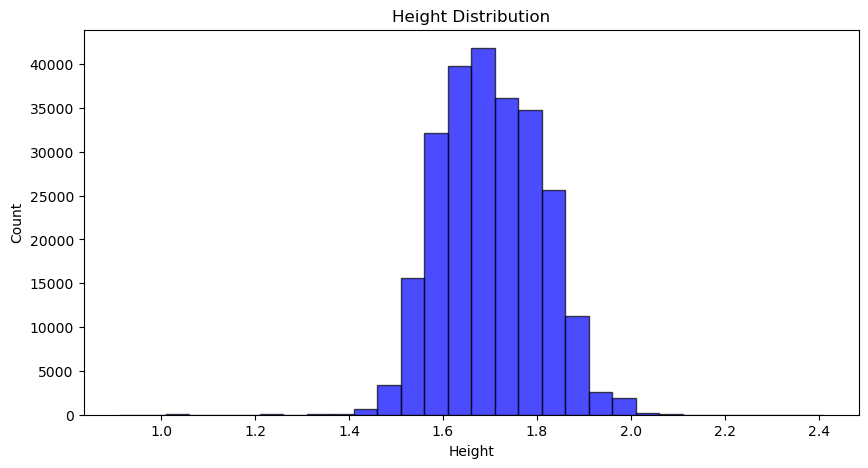

In [2137]:
display_plot(numerical_df, 'HeightInMeters', 'hist', xlabel='Height', ylabel='Count', title='Height Distribution')

As we can see the HeightInMeters values it has 101 unique values and has a normal distributions. Almost all values are falls into the range between 1.5 to 1.9 meters.

#### WeightInKilograms

In [2140]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'WeightInKilograms']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
31,WeightInKilograms,float64,Reported weight in kilograms,516,0,"[71.67, 95.25, 108.86, 90.72, 79.38, 120.2, 88.0, 74.84, 78.02, 63.5, 122.47, 115.67, 81.65, 86.18, 76.2, 54.88, 72.57, 88.45, 104.33, 52.16, 68.04, 65.77, 56.7, 94.8, 123.83, 50.8, 68.95, 113.4, 83.91, 77.56, 68.49, 82.1, 80.74, 106.14, 58.06, 61.69, 57.61, 84.82, 70.76, 70.31, 91.63, 102.06, 48.08, 61.23, 109.77, 99.79, 58.97, 110.68, 64.86, 111.13, 45.36, 79.83, 98.88, 55.34, 101.6, 77.11, 93.89, 71.21, 49.9, 96.16, 163.29, 120.66, 97.52, 88.9, 44.91, 85.73, 83.46, 92.99, 132.0, 67.59, 92.08, 73.48, 107.5, 107.95, 91.17, 74.39, 64.41, 62.6, 46.72, 103.42, 87.09, 89.81, 83.01, 100.7, 56.25, 96.62, 66.68, 67.13, 69.4, 58.51, 78.93, 95.71, 63.05, 49.44, 127.01, 145.15, 122.02, 107.05, 126.55, 117.03, ...]","(28.12, 292.57)"


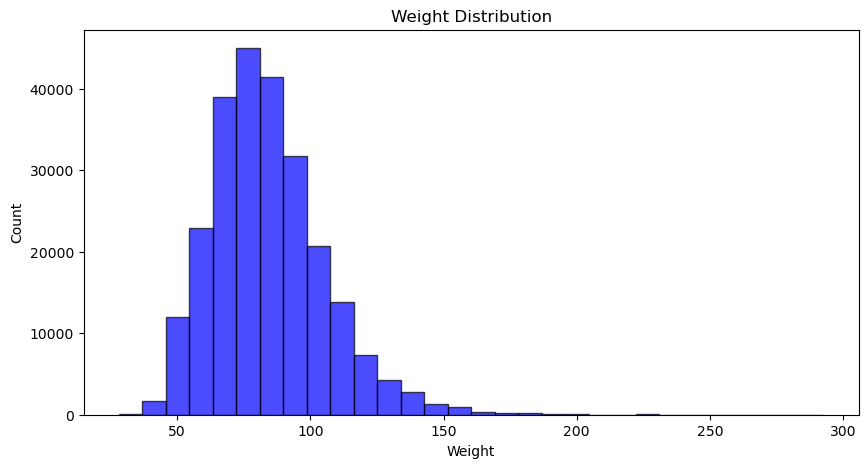

In [2141]:
display_plot(numerical_df, 'WeightInKilograms', 'hist', xlabel='Weight', ylabel='Count', title='Weight Distribution')

As we can see from the data we have almost 516 unique values for the weight. And the distribution is looking like a normal distribution. The most of the weight values falls between 60 to 120 kgs.

#### BMI

In [2144]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'BMI']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
32,BMI,float64,Body Mass Index (BMI),3514,0,"[27.99, 30.13, 31.66, 31.32, 33.07, 34.96, 33.3, 24.37, 26.94, 22.6, 36.62, 46.87, 32.74, 35.15, 27.26, 28.28, 25.54, 20.14, 25.06, 27.2, 27.34, 33.89, 27.12, 31.89, 32.08, 21.03, 28.34, 33.96, 26.52, 38.74, 26.61, 29.95, 21.93, 21.46, 22.67, 25.68, 28.35, 36.02, 21.87, 26.09, 36.92, 28.97, 34.33, 27.46, 27.98, 27.6, 21.29, 25.92, 27.52, 28.73, 31.74, 21.81, 21.97, 26.56, 24.0, 31.12, 35.43, 29.48, 25.02, 24.96, 28.98, 43.9, 25.61, 28.12, 21.41, 19.79, 17.81, 27.89, 37.9, 29.84, 20.36, 34.54, 34.03, 44.29, 27.02, 26.63, 30.62, 32.32, 34.95, 19.53, 28.41, 21.13, 34.14, 30.18, 24.68, 41.01, 33.0, 21.61, 36.15, 23.71, 32.28, 40.29, 34.45, 26.95, 21.77, 20.78, 27.5, 29.26, 25.09, 32.23, ...]","(12.02, 97.65)"


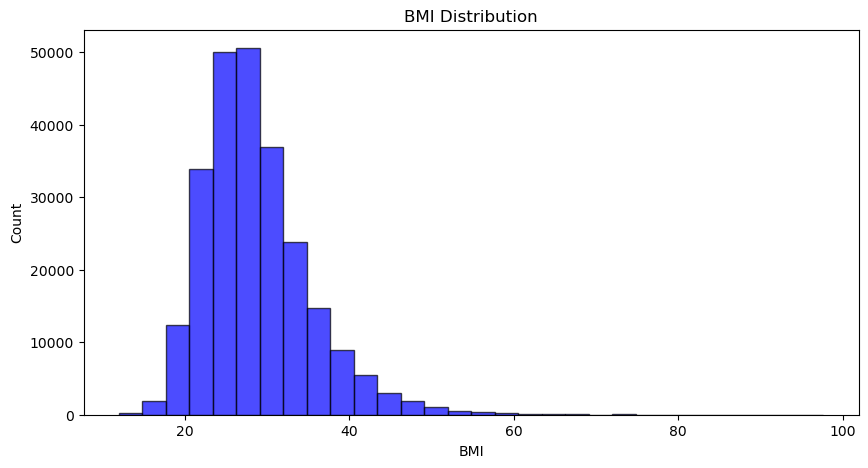

In [2145]:
display_plot(numerical_df, 'BMI', 'hist', xlabel='BMI', ylabel='Count', title='BMI Distribution')

The majority of the population falls within the normal to overweight BMI categories. There are fewer people in the underweight (BMI < 18.5) and extremely high BMI categories.

It is a good fact that the HeightInMeters, WeightInKilograms and BMI are almost normally distributed because they will play a important role in our model prediction.

### Categorical Features

In [2148]:
# Get the numerical features
categorical_df = df.select_dtypes(include=object)
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 0 to 246021
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   State                  246013 non-null  object
 1   Sex                    246013 non-null  object
 2   GeneralHealth          246013 non-null  object
 3   LastCheckupTime        246013 non-null  object
 4   PhysicalActivities     246013 non-null  object
 5   HadHeartAttack         246013 non-null  object
 6   HadAngina              246013 non-null  object
 7   HadStroke              246013 non-null  object
 8   HadCOPD                246013 non-null  object
 9   HadDepressiveDisorder  246013 non-null  object
 10  HadKidneyDisease       246013 non-null  object
 11  HadArthritis           246013 non-null  object
 12  HadDiabetes            246013 non-null  object
 13  SmokerStatus           246013 non-null  object
 14  ECigaretteUsage        246013 non-null  object
 15  Chest

#### State

In [2150]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'State']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
0,State,object,State FIPS Code,54,0,"[Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, District of Columbia, Florida, Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming, Guam, Puerto Rico, Virgin Islands]",N/A


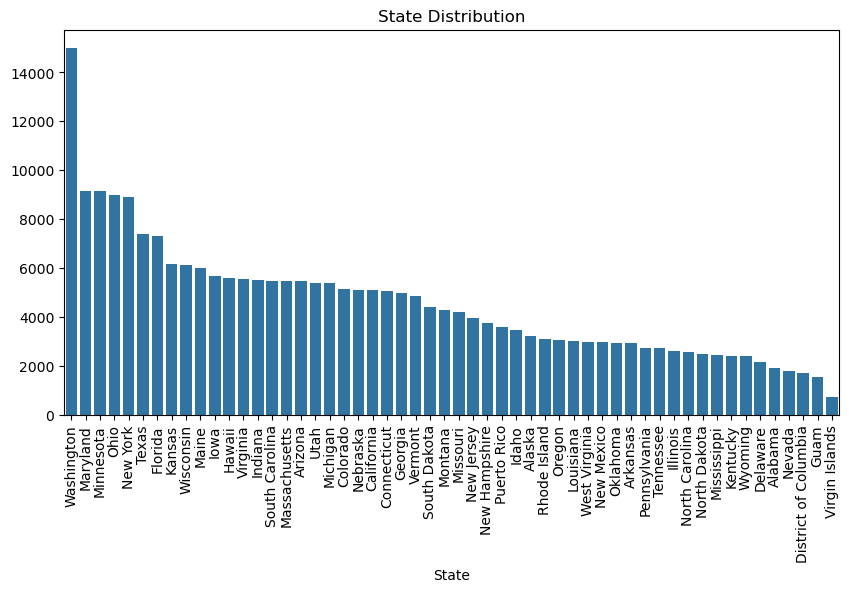

In [2151]:
display_plot(categorical_df, 'State', 'bar', xlabel='State', ylabel='Count', title='State Distribution',title_orientation='vertical')

Washington has the highest number of entries, followed by Maryland, Minnesota, and other states. The distribution suggests that certain states have a significantly higher representation in the dataset, while others, including Guam and the Virgin Islands, have much fewer entries.

#### Sex

In [2154]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'Sex']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
1,Sex,object,Sex of Respondent,2,0,"[Female, Male]",N/A


In [2155]:
# Get all the unique values from sex columns and their counts
categorical_df['Sex'].value_counts()

Sex
Female    127806
Male      118207
Name: count, dtype: int64

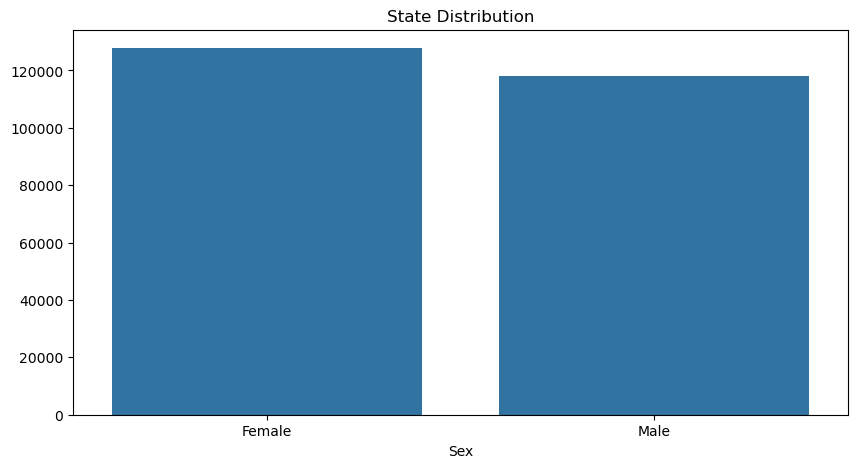

In [2156]:
display_plot(categorical_df, 'Sex', 'bar', xlabel='State', ylabel='Count', title='State Distribution')

As we can see we have almost same amount of entries for male and female in our dataset. It will help us to easily find which gender is more prevelent to the heart attack.

#### GeneralHealth

In [2159]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'GeneralHealth']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
2,GeneralHealth,object,Would you say that in general your health is:,5,0,"[Very good, Fair, Good, Excellent, Poor]",N/A


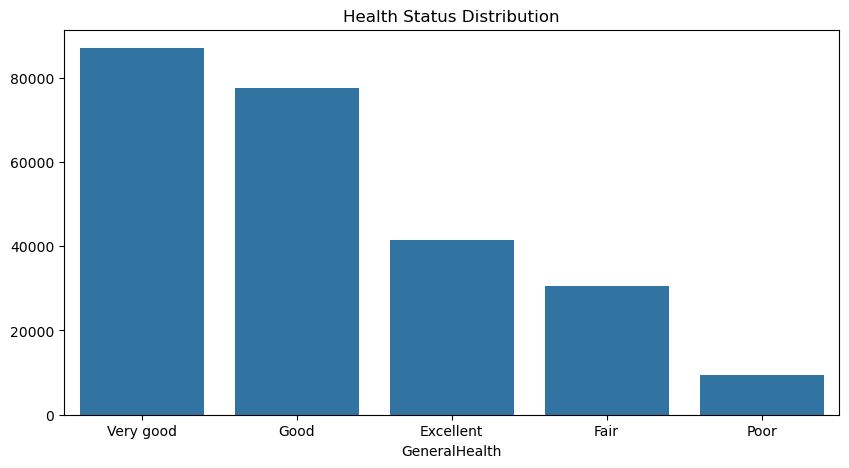

In [2160]:
display_plot(categorical_df, 'GeneralHealth', 'bar', xlabel='Health Status', ylabel='Count', title='Health Status Distribution')

"Very good" has the highest count, followed closely by "Good," indicating that most individuals in the dataset perceive their health positively. "Excellent" is significantly lower than the first two, while "Fair" and "Poor" have the lowest counts, suggesting that fewer individuals report poor health. 

As we have GeneralHealth feature which likely provides a comprehensive summary of health, We should remove the 'PhysicalHealthDays','MentalHealthDays' and 'LastCheckupTime' columns.

Which will help us to reduce the multicoliniarity and help us to improve the accuracy of our modal.

In [2163]:
# Drop the columns
df = df.drop(columns=['PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime'])

In [2164]:
# Look at the column information after dropping some of them
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 0 to 246021
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   State                  246013 non-null  object 
 1   Sex                    246013 non-null  object 
 2   GeneralHealth          246013 non-null  object 
 3   PhysicalActivities     246013 non-null  object 
 4   SleepHours             246013 non-null  float64
 5   HadHeartAttack         246013 non-null  object 
 6   HadAngina              246013 non-null  object 
 7   HadStroke              246013 non-null  object 
 8   HadCOPD                246013 non-null  object 
 9   HadDepressiveDisorder  246013 non-null  object 
 10  HadKidneyDisease       246013 non-null  object 
 11  HadArthritis           246013 non-null  object 
 12  HadDiabetes            246013 non-null  object 
 13  SmokerStatus           246013 non-null  object 
 14  ECigaretteUsage        246013 non-null  o

In [2165]:
# Drop LastCheckupTime from our categorical_df - Which is used to list all the categorical columns
categorical_df = categorical_df.drop(columns=['LastCheckupTime'])
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 0 to 246021
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   State                  246013 non-null  object
 1   Sex                    246013 non-null  object
 2   GeneralHealth          246013 non-null  object
 3   PhysicalActivities     246013 non-null  object
 4   HadHeartAttack         246013 non-null  object
 5   HadAngina              246013 non-null  object
 6   HadStroke              246013 non-null  object
 7   HadCOPD                246013 non-null  object
 8   HadDepressiveDisorder  246013 non-null  object
 9   HadKidneyDisease       246013 non-null  object
 10  HadArthritis           246013 non-null  object
 11  HadDiabetes            246013 non-null  object
 12  SmokerStatus           246013 non-null  object
 13  ECigaretteUsage        246013 non-null  object
 14  ChestScan              246013 non-null  object
 15  RaceE

#### HadHeartAttack

In [2167]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'HadHeartAttack']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
9,HadHeartAttack,object,Ever told you had a heart attack (myocardial infarction)?,2,0,"[No, Yes]",N/A


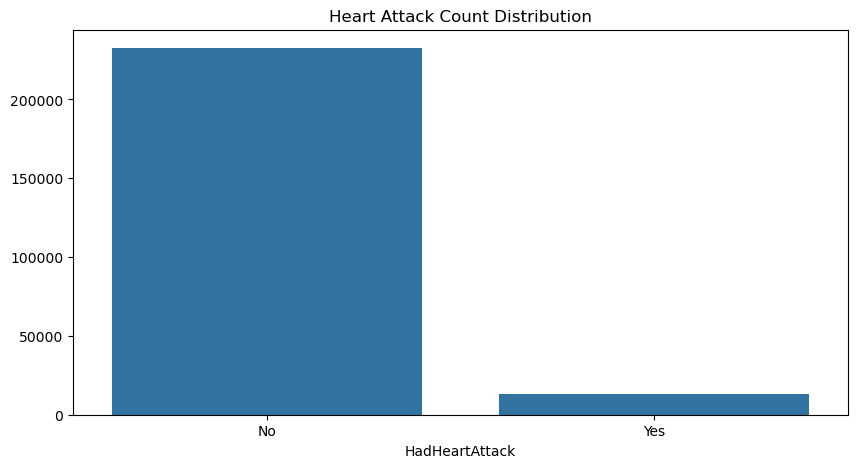

In [2168]:
display_plot(categorical_df, 'HadHeartAttack', 'bar', xlabel='Heart Attack', ylabel='Count', title='Heart Attack Count Distribution')

The bar chart shows the distribution of individuals based on whether they have had a heart attack, with "No" being significantly more common than "Yes." 

This indicates that most people in the dataset have not experienced a heart attack. Since this will be the target feature, the dataset is highly imbalanced, which may require special handling during model training to improve prediction accuracy.

#### HadStroke

In [2171]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'HadStroke']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
11,HadStroke,object,Ever told you had a stroke?,2,0,"[No, Yes]",N/A


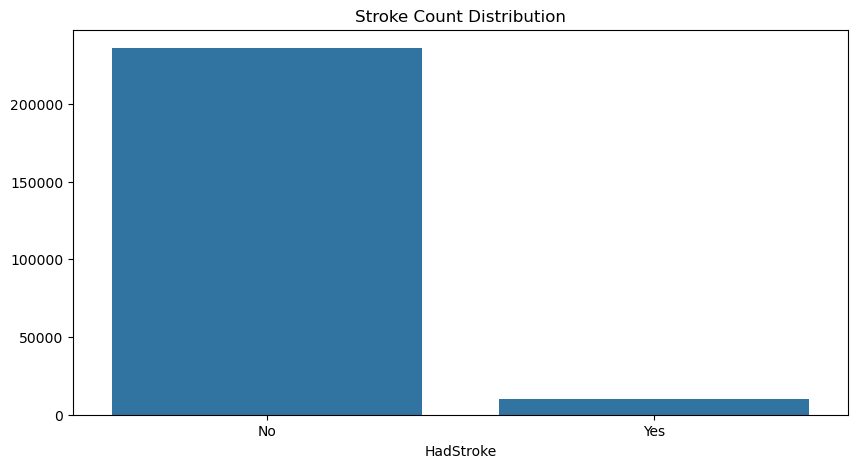

In [2172]:
display_plot(categorical_df, 'HadStroke', 'bar', xlabel='Stroke', ylabel='Count', title='Stroke Count Distribution')

The bar chart shows the distribution of individuals based on whether they have had a stroke. The distribution is almost same as HadHeartAttack. This shows that the both features are related.

#### HadDiabetes

In [2175]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'HadDiabetes']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
18,HadDiabetes,object,Ever told you had diabetes?,4,0,"[No, Yes, Yes, but only during pregnancy (female), No, pre-diabetes or borderline diabetes]",N/A


As we can see we have four different Categories for the HadDiabetes. Let's conver last two values into Yes or No for simplicity.

Gestational diabetes is a temporary condition but still a form of hyperglycemia linked to metabolic health. So we can convert <b>Yes, but only during pregnancy (female)</b> to  <b>Yes</b>.

Pre-diabetes is a risk factor for heart disease but not a direct "Yes" for diabetes. So we can convert <b>No, pre-diabetes or borderline diabetes</b> to <b>No</b>.

In [2177]:
# Recategorize the value-names in HadDiabetes column

df['HadDiabetes'].replace({'No, pre-diabetes or borderline diabetes' : 'No',
                            'Yes, but only during pregnancy (female)' : 'Yes'} , inplace=True)
categorical_df['HadDiabetes'].replace({'No, pre-diabetes or borderline diabetes' : 'No',
                            'Yes, but only during pregnancy (female)' : 'Yes'} , inplace=True)

df['HadDiabetes'].unique()

/var/folders/xs/lmj1m_lx04z15s1p5yz456100000gn/T/ipykernel_3737/1785320703.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HadDiabetes'].replace({'No, pre-diabetes or borderline diabetes' : 'No',
/var/folders/xs/lmj1m_lx04z15s1p5yz456100000gn/T/ipykernel_3737/1785320703.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

array(['No', 'Yes'], dtype=object)

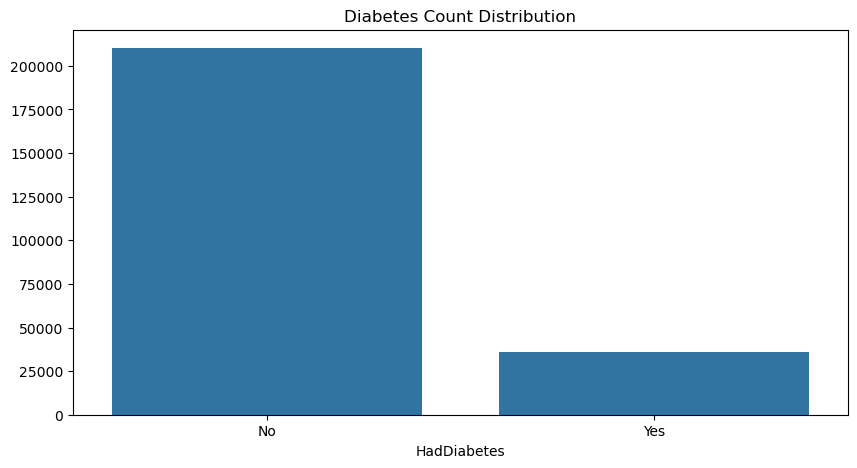

In [2178]:
display_plot(categorical_df, 'HadDiabetes', 'bar', xlabel='Diabetes', ylabel='Count', title='Diabetes Count Distribution')

No represents individuals without diabetes. This has the highest count, exceeding 200,000.
Yes represents individuals with diabetes. The count is significantly lower than "No," around 35,000.

And there are two other categories than Yes and No. It will be the good idea to convert them to Yes or No accordingly.

#### SmokerStatus

In [2181]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'SmokerStatus']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
25,SmokerStatus,object,"Four-level smoker status: Everyday smoker, Someday smoker, Former smoker, Non-smoker",4,0,"[Former smoker, Never smoked, Current smoker - now smokes every day, Current smoker - now smokes some days]",N/A


We can combine daily and occasional smokers into "Current Smoker" because any smoking (even sometimes) harms the heart. 

"Past Smoker" is kept separate because quitting reduces risk but doesn’t erase it completely. 

"Never Smoked" is the safest group. This grouping keeps things simple for the model while still showing how smoking history affects heart attack risk.

In [2183]:
# Rename the value-names in SmokerStatus column

df['SmokerStatus'].replace({'Current smoker - now smokes every day': 'Current Smoker',
    'Current smoker - now smokes some days': 'Current Smoker'} , inplace=True)
categorical_df['SmokerStatus'].replace({'Current smoker - now smokes every day': 'Current Smoker',
    'Current smoker - now smokes some days': 'Current Smoker'} , inplace=True)

df['SmokerStatus'].unique()

/var/folders/xs/lmj1m_lx04z15s1p5yz456100000gn/T/ipykernel_3737/4275565284.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SmokerStatus'].replace({'Current smoker - now smokes every day': 'Current Smoker',
/var/folders/xs/lmj1m_lx04z15s1p5yz456100000gn/T/ipykernel_3737/4275565284.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

array(['Former smoker', 'Never smoked', 'Current Smoker'], dtype=object)

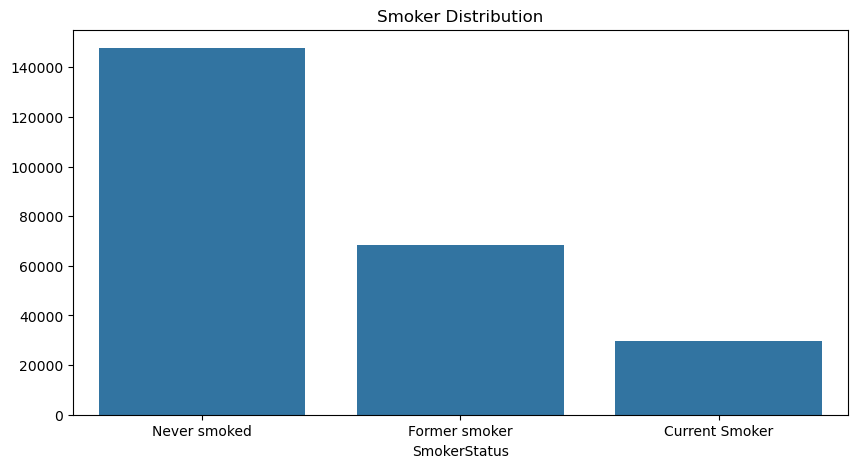

In [2184]:
display_plot(categorical_df, 'SmokerStatus', 'bar', xlabel='Diabetes', ylabel='Count', title='Smoker Distribution')

As we have SmokerStatus column then it will be a good idea to drop the ECigaretteUsage column. 

In [2186]:
df = df.drop(columns=['ECigaretteUsage'])

#### RaceEthnicityCategory

In [2188]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'RaceEthnicityCategory']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
28,RaceEthnicityCategory,object,Five-level race/ethnicity category,5,0,"[White only, Non-Hispanic, Black only, Non-Hispanic, Other race only, Non-Hispanic, Multiracial, Non-Hispanic, Hispanic]",N/A


Let's simplify the names of the five unique values for better understandability.

In [2190]:
# Rename the value-names in RaceEthnicityCategory column
df['RaceEthnicityCategory'].replace({'White only, Non-Hispanic': 'White',
    'Black only, Non-Hispanic': 'Black',
    'Other race only, Non-Hispanic': 'Other',
    'Multiracial, Non-Hispanic': 'Multiracial',
    'Hispanic': 'Hispanic'} , inplace=True)

categorical_df['RaceEthnicityCategory'].replace({'White only, Non-Hispanic': 'White',
    'Black only, Non-Hispanic': 'Black',
    'Other race only, Non-Hispanic': 'Other',
    'Multiracial, Non-Hispanic': 'Multiracial',
    'Hispanic': 'Hispanic'} , inplace=True)

df['RaceEthnicityCategory'].unique()

/var/folders/xs/lmj1m_lx04z15s1p5yz456100000gn/T/ipykernel_3737/3257653796.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RaceEthnicityCategory'].replace({'White only, Non-Hispanic': 'White',
/var/folders/xs/lmj1m_lx04z15s1p5yz456100000gn/T/ipykernel_3737/3257653796.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

array(['White', 'Black', 'Other', 'Multiracial', 'Hispanic'], dtype=object)

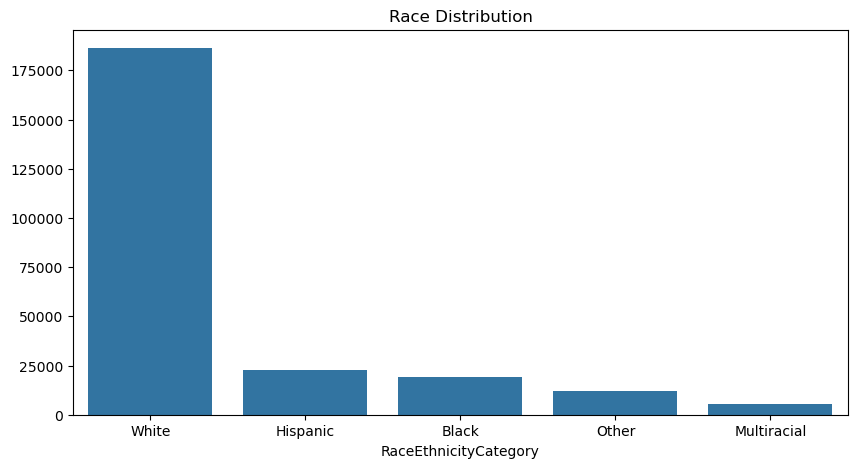

In [2191]:
display_plot(categorical_df, 'RaceEthnicityCategory', 'bar', xlabel='Diabetes', ylabel='Count', title='Race Distribution')

the chart shows a clear dominance of the "White only, Non-Hispanic" category within the provided dataset. The other racial and ethnic groups have significantly lower representation.

#### AgeCategory

In [2194]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'AgeCategory']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
29,AgeCategory,object,Fourteen-level age category,13,0,"[Age 65 to 69, Age 70 to 74, Age 75 to 79, Age 80 or older, Age 50 to 54, Age 40 to 44, Age 60 to 64, Age 55 to 59, Age 45 to 49, Age 35 to 39, Age 25 to 29, Age 30 to 34, Age 18 to 24]",N/A


Let's convert the AgeCategory values in a simple version.

In [2196]:
age_mapping = {
    "Age 18 to 24": "18-24",
    "Age 25 to 29": "25-29",
    "Age 30 to 34": "30-34",
    "Age 35 to 39": "35-39",
    "Age 40 to 44": "40-44",
    "Age 45 to 49": "45-49",
    "Age 50 to 54": "50-54",
    "Age 55 to 59": "55-59",
    "Age 60 to 64": "60-64",
    "Age 65 to 69": "65-69",
    "Age 70 to 74": "70-74",
    "Age 75 to 79": "75-79",
    "Age 80 or older": "80+"
}

df['AgeCategory'] = df['AgeCategory'].map(age_mapping)
categorical_df['AgeCategory'] = categorical_df['AgeCategory'].map(age_mapping)

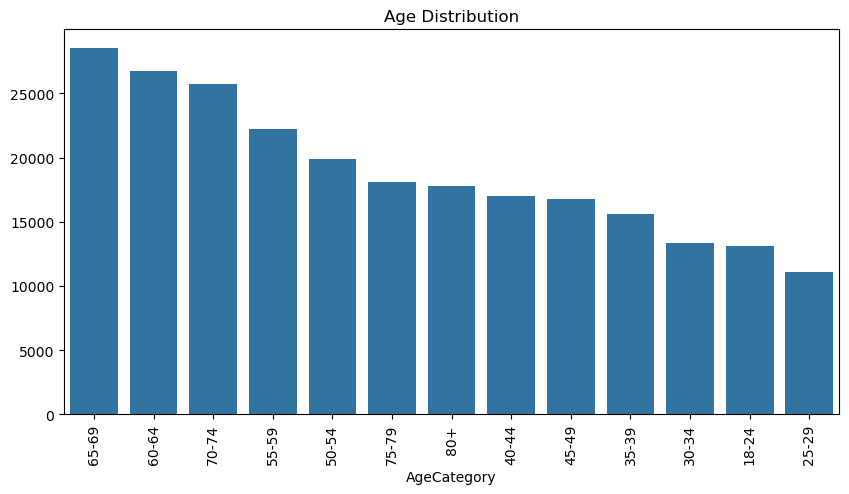

In [2197]:
display_plot(categorical_df, 'AgeCategory', 'bar', xlabel='Diabetes', ylabel='Count', title='Age Distribution',title_orientation='vertical')

The bar chart presents data categorized by age groups, it shows a clear downward trend.  The oldest age group, 65 to 69, has the highest value, while the youngest group, 25 to 29, are the lowest.

#### AlcoholDrinkers

In [2200]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'AlcoholDrinkers']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
33,AlcoholDrinkers,object,Adults who reported having had at least one drink of alcohol in the past 30 days,2,0,"[No, Yes]",N/A


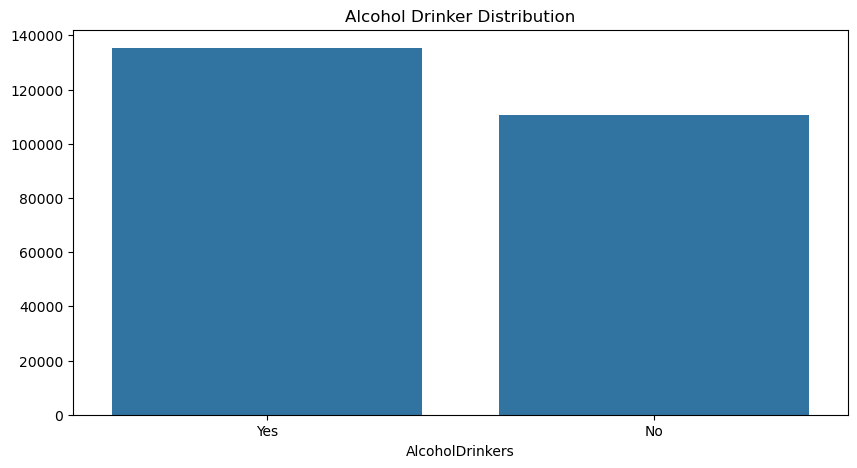

In [2201]:
display_plot(categorical_df, 'AlcoholDrinkers', 'bar', xlabel='Diabetes', ylabel='Count', title='Alcohol Drinker Distribution')

In [2202]:
df.to_csv('./../data/heart_attack_cleaned_v1.csv', index=False)

## References with Links:

1. American Heart Association (AHA) - "Understand Your Risks to Prevent a Heart Attack"
https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack

2. World Health Organization (WHO) - "Cardiovascular Diseases (CVDs)"
https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

3. Mayo Clinic - "Heart Disease and Oral Health: Is There a Link?"
https://www.mayoclinic.org/healthy-lifestyle/adult-health/expert-answers/heart-disease-and-oral-health/faq-20447581

4. Data Source - "Kaggle"
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease